# M2 - Hypothesis Simulation 

## Author -


## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model




### Note
Please clearly outline the resultms with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

### Note: since we are using the same dataset for L5 and M02, so I choose different features to analyze

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy.random as nr
import scipy.stats as ss
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy.integrate import quad
import scipy
%matplotlib inline

In [3]:
#read data
df = pd.read_csv(fileName)

In [4]:
df.iloc[::,0:10].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4


View the first ten columns to get a sense what data look like. And we can see that there are missing values, labeled as "?"

In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Check out all features the data set hav, and their data types

### 1. Identify a likely distribution for price and several other features. For example, you should determine if the price is better represented by the log of price.

#### Let's study the distribution of price first.

In [6]:
#using to_numeric to convert dtype to numberic type
df['price'] = pd.to_numeric(df['price'], errors='coerce')

#if they are missing values, remove the missing values of
df.dropna(inplace=True)

#create log price
df['log price'] = np.log(df['price'])

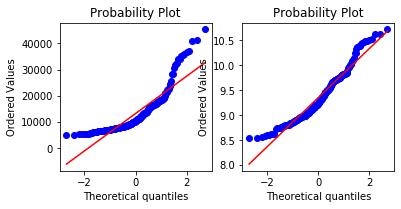

In [7]:
def qq_plot(vec1, vec2):
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
    
qq_plot(df['price'],df['log price'])

Q-Q plots for price(left) and log price(right) are shown above. By eyes, log price is more straight than price, suggesting that log price could be more approaching normal than price.


We need to do a further test to evaluate that. K-S test could be used.And we need to standardized samples before applying the K-S test.

In [8]:
#standardize both price and log price
n_p = scale(df['price'])
n_lp = scale(df['log price'])

In [9]:
def ks_test(dat, name, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic for '+ name + ' = ' + str(ks_statisic))
    print('P-value for ' + name + '= ' + str(pvalue))
    
ks_test(n_p, 'price')    

KS-statistic for price = 0.1542761480184771
P-value for price= 0.00012108611006800808


In [10]:
ks_test(n_lp, 'log price')   

KS-statistic for log price = 0.09781904713791056
P-value for log price= 0.03984598613097214


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases. If we set threshold alpha smaller, like 1%. In this case, we cannot reject the hypothesis for log price, suggesting that log price has no difference to normal distribution. Thus, log price can be better represented as a normal distribution.

### Next, study the distribution of other numberical featueres.

### First, study the distribution of stroke.

In [11]:
#using to_numeric to convert dtype to numberic type
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')

#if they are missing values, remove the missing values of
df.dropna(inplace=True)

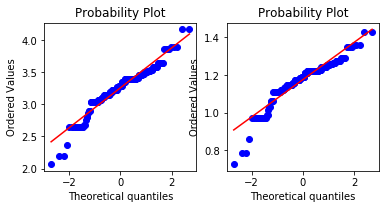

In [12]:
df['log stroke'] = np.log(df['stroke'])
qq_plot(df['stroke'],df['log stroke'])

Q-Q plots for stroke(left) and log stroke(right) are shown above. By eyes, stroke is more straight than log stroke, suggesting that stroke could be more approaching normal than log stroke.

We need to do a further test to evaluate that. K-S test could be used.And we need to standardized samples before applying the K-S test.

The null hypothesis for K-S test is two distributions have no differece.With p-value greater than threshold (0.05) suggesting that we cannot reject hypothesis, so there is no difference between two samples.

In [13]:
#standardize both price and log price
n_s = scale(df['stroke'])
n_ls = scale(df['log stroke'])
ks_test(n_s, 'stroke')
print('\n')
ks_test(n_ls, 'log stroke')

KS-statistic for stroke = 0.11623896681180132
P-value for stroke= 0.00893115252806974


KS-statistic for log stroke = 0.13634432672905863
P-value for log stroke= 0.0011769694539608064


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases, implying that both samples are different than normal distribution. 

If we set threshold alpha smaller, like 0.1%. In this case, we cannot reject the hypothesis for stroke, suggesting that stroke has no difference to normal distribution. Thus, stroke can be better represented as a normal distribution.

### Then study the distribution of  wheel-base.

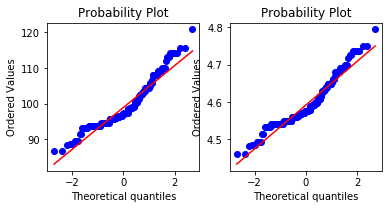

In [14]:
df['log wheel-base'] = np.log(df['wheel-base'])
qq_plot(df['wheel-base'],df['log wheel-base'])

Q-Q plots for wheel-base(left) and log wheel-base(right) are shown above. By eyes, wheel-base is more straight than log wheel-base, suggesting that wheel-base could be more approaching normal than log wheel-base.

We need to do a further test to evaluate that. K-S test could be used.And we need to standardized samples before applying the K-S test.

The null hypothesis for K-S test is two distributions have no differece.With p-value greater than threshold (0.05) suggesting that we cannot reject hypothesis, so there is no difference between two samples.

In [15]:
#standardize both price and log price
n_w = scale(df['wheel-base'])
n_lw = scale(df['log wheel-base'])
ks_test(n_w, 'wheel-base')
print('\n')
ks_test(n_lw, 'wheel-base')

KS-statistic for wheel-base = 0.1700952463430634
P-value for wheel-base= 1.879437282001795e-05


KS-statistic for wheel-base = 0.16168984354632226
P-value for wheel-base= 5.742954428874821e-05


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases, implying that both samples are different than normal distribution.

If we set threshold alpha much smaller, or look at larger-value. The larger p-value is, it is more likely we cannot reject the null hypothesis, that means it has no difference to normal distribution. 

In this case, log wheel-base has larger p-value, we cannot reject the hypothesis, suggesting that log wheel-base has no difference to normal distribution. Thus, log wheel-base can be better represented as a normal distribution.

### Then study the distribution of compression-ratio

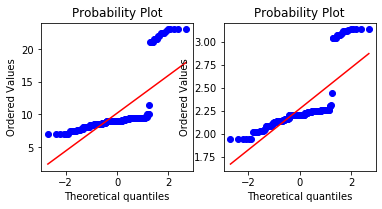

In [16]:
df['log compression-ratio'] = np.log(df['compression-ratio'])
qq_plot(df['compression-ratio'],df['log compression-ratio'])

Q-Q plots for compression-ratio(left) and log compression-ratio(right) are shown above. By eyes, both are not stragiht. But log compression-ratioi is more straight than compression-ratio, suggesting that log compression-ratio could be more approaching normal than compression-ratio.

We need to do a further test to evaluate that. K-S test could be used.And we need to standardized samples before applying the K-S test.

The null hypothesis for K-S test is two distributions have no differece.With p-value greater than threshold (0.05) suggesting that we cannot reject hypothesis, so there is no difference between two samples.

In [17]:
#standardize both price and log price
n_c = scale(df['compression-ratio'])
n_lc = scale(df['log compression-ratio'])
ks_test(n_c, 'compression-ratio')
print('\n')
ks_test(n_lc, 'compression-ratio')

KS-statistic for compression-ratio = 0.43531695986076147
P-value for compression-ratio= 1.8092503401506387e-34


KS-statistic for compression-ratio = 0.38887259972608884
P-value for compression-ratio= 2.4606392047262115e-27


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases, implying that both samples are different than normal distribution.

If we set threshold alpha much smaller, or look at larger-value. The larger p-value is, it is more likely we cannot reject the null hypothesis, that means it has no difference to normal distribution.

In this case, log compression-ratio has larger p-value, we cannot reject the hypothesis, suggesting that log compression-ratio has no difference to normal distribution. Thus, log compression-ratio can be better represented as a normal distribution.

### 2. Compute basic summary statistic of the mean by both classical bootstrap and Bayesian methods

##### Let's do bootstrp mean.
Stroke is choosen to perform the analysis.

In above analysis,  stroke can be better represented as a normal distribution.

In [18]:
# boostrap sample
bstrap = df.sample(frac = 1, replace=True)
#calculate the mean of boostrap sample
stroke = bstrap['stroke'].mean()
bstrap_sum = pd.DataFrame({ 'stroke mean':[stroke]})
bstrap_sum.round(2)

,stroke mean
0,3.3


Stroke mean is estimated usign Boostrap method, to be 3.27

##### Compute the mean using Bayesian method.
To perform this analysis, we need to select a prior distribution and compute the likelihood. First, we will address the likelihood.

For features I selected, stroke I will use Normal likelihood, that means my prior probability would be normal as well.

##### Mean for stroke in Bayesian method

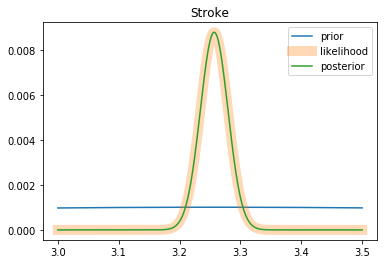

In [19]:
N = 1000
p = np.linspace(3, 3.5, num=N)

pp = ss.norm.pdf(p, loc=df['stroke'].mean(), scale=1)
pp = pp / pp.sum() # normalize

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
#     print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_stroke = comp_like(p, df['stroke'])
post_stroke= posterior(pp, like_stroke)

# plotting the prior, likelihood and posterior distribution
plt.plot(p, pp, label='prior')
plt.plot(p, like_stroke, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_stroke, label='posterior')
plt.title('Stroke')
plt.legend();

Becaues stroke is a discrete random varibale, expectecd  value can be calculated by sum (x*p(X=x)). So the mean of the posterior distribution can be calcualted as below.

In [20]:
bayesian_mean = sum(post_stroke * p)
print('Mean for posterior distribution = %.2f' % (bayesian_mean))

Mean for posterior distribution = 3.26


In the log height feature, mean estimated using boostrapping is 3.90, while mean estimated using bayesian is 3.28. They are close to each other. 

### 3.Compute confidence intervals for the summary statistics by classical bootstrap and Bayesian methods

In [21]:
#define a function to compute condifence intervals at 95% confidence interval
def ci(x, name):
    p = 5
    lower = np.percentile(x, p/2.)
    upper = np.percentile(x, 100-p/2.)
    print("Confidence interval for %s is %.2f and %.2f" % (name, lower, upper))

In [22]:
#compute the confidence interval using classical method
ci(df['stroke'], 'stroke')

Confidence interval for stroke is 2.64 and 3.86


In [23]:
#compute the confidence interval using boostrap method
ci(bstrap['stroke'], 'stroke')

Confidence interval for stroke is 2.64 and 3.86


Condience intervals for classical and boostrap methods are very close to each other.

The 0.950 credible interval is 3.211 to 3.302


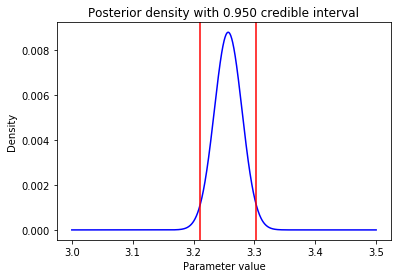

In [24]:
def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    from matplotlib import pyplot
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = np.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, ci[0], ci[1]))
    
plot_ci(p, post_stroke, N, lower_q=.025, upper_q=.975)

Using the classical boostrapping method, the confidence interval for log height is 2.64 and 3.86, while in the Bayesian method, the confidence interval for log height is 3.210 to 3.300. They have overlaps in some ranges.

### 4.Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are statistically significant. You will continue the analysis that you started in Assignment 04. For each of the groupings you analyzed in Assignment 04, apply the following methods:
### 1. Bootstrap methods
### 2. Bayesian model

### First, do the pairs study first

#### Boostrap method Price vs Fuel-type


In [25]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

Check out what fuel type it has. 

It has two: gas and diesel

In [26]:
#create new dataframes for gas and diesel
diesel =pd.DataFrame()
gas = pd.DataFrame()
print ( 'total diesel smaples:' ,sum(bstrap['fuel-type'] == 'diesel'))
print('total samples:' ,bstrap.shape[0])

total diesel smaples: 22
total samples: 197


Check the sample size for each aspiration, and found that this is an unbalance sample size problem. Solution to this unbalance problem is get the same group size.

First, I need to boostrap samples, then I need to randomly pick 23 samples from gas use Bernoulli sampling.

In [27]:
# put samples into correponding dataframe
gas['gas price']=bstrap[bstrap['fuel-type'] == 'gas']['log price']
diesel['diesel price']=bstrap[bstrap['fuel-type'] == 'diesel']['log price']


#  Bernoulli sampling
p = 0.1
gas_23 = gas.iloc[nr.choice(range(174), size = int(p * 230)), :]

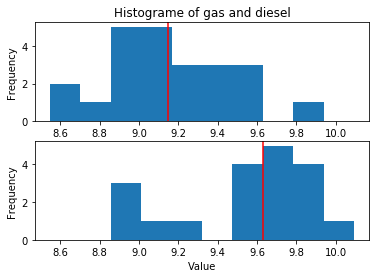

In [28]:
def hist_plot(vec, bins):
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
#     print(mean(vec))
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['gas', 'diesel'], nbins = 10):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(gas_23['gas price'], diesel['diesel price']) 

Histogram of log price for gas and diesel look quite different, but with a similar mean values.

In [29]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, 
                                  alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 
             'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1],
                      confint[0], confint[1]], index = index)   
   
aspiration = t_test(gas_23['gas price'], diesel['diesel price'],0.05) 
aspiration

DegFreedom    41.089925
Difference    -0.485741
Statistic     -4.507604
PValue         0.000054
Low95CI       -0.703354
High95CI      -0.268129
dtype: float64

From stats (Boostrap method for price vs fuel-type):

The t-statistic is small and the p-value is small(alpha = 0.05). Based on these statistics, we can reject the null hypothesis that log price for gas car is different than diesel car.

#### Bayesian method for Price vs Fuel-type

In [30]:
#create std and turbo data frame with log price
g =pd.DataFrame()
d = pd.DataFrame()
g['gas price']=df[df['fuel-type'] == 'gas']['log price']
d['diesel price']=df[df['fuel-type'] == 'diesel']['log price']

#  Bernoulli sampling, solve unbalanced sample problem
p = 0.1
g_23 = gas.iloc[nr.choice(range(174), size = int(p * 230)), :]

In [31]:
#create a posterior distribution for gas
N = 10000
p = np.linspace(8, 12, num=N)

pp = ss.norm.pdf(p, loc=g_23.mean(), scale=1)
pp = pp / pp.sum() # normalize

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
#     print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_gas = comp_like(p, g_23['gas price'])
post_gas= posterior(pp, like_gas)

# plotting the prior, likelihood and posterior distribution
# plt.plot(p, pp, label='prior')
# plt.plot(p, like_gas, label='likelihood', alpha=.3, linewidth=10)
# plt.plot(p, post_gas, label='posterior')
# plt.title('Height')
# plt.legend();

In [32]:
#create a posterior distribution for diesel
pp = ss.norm.pdf(p, loc=d.mean(), scale=1)
pp = pp / pp.sum() # normalize

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
#     print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_diesel = comp_like(p, d['diesel price'])
post_diesel= posterior(pp, like_diesel)

# # plotting the prior, likelihood and posterior distribution
# plt.plot(p, pp, label='prior')
# plt.plot(p, like_diesel, label='likelihood', alpha=.3, linewidth=10)
# plt.plot(p, post_diesel, label='posterior')
# plt.title('Height')
# plt.legend();


To further study two posterior distribution, I calculate the credible interval of two.

First, plot the CI for price of gas

The 0.950 credible interval is 9.201 to 9.579


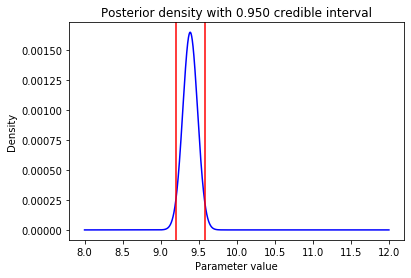

In [33]:
plot_ci(p, post_gas, N, lower_q=.025, upper_q=.975)

Plot the CI for price of diesel

The 0.950 credible interval is 9.345 to 9.767


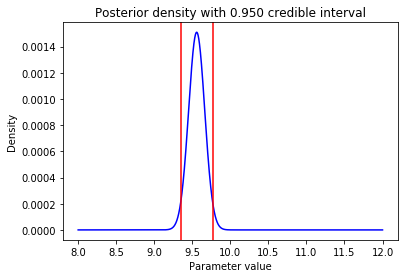

In [34]:
plot_ci(p, post_diesel, N, lower_q=.025, upper_q=.975)

From the above credible interval comparsion, CIs have a little overlap, that means price for gas has no  difference to price for diesel cars, combined with boostrapping analysis, such little overlap could be misleading to draw conclusions. 

## Summary for pairs comparison:
Both boostrap and Bayesian methods, combined with L4 classical method, I'd say price for gas is different than diesel car price.

### Multipopulation

#### Boostrap for engine -type analysis

In [35]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype=object)

Check what inputs are for engine-type. There are five categories, dohc, ohcv, ohc, l and ohcf.

In [36]:
dohc= pd.DataFrame()
ohcv= pd.DataFrame()
ohc= pd.DataFrame()
l = pd.DataFrame()
ohcf = pd.DataFrame()

dohc['price']=bstrap[bstrap['engine-type'] == 'dohc']['log price']
ohcv['price']=bstrap[bstrap['engine-type'] == 'ohcv']['log price']
ohc['price']=bstrap[bstrap['engine-type'] == 'ohc']['log price']
l['price']=bstrap[bstrap['engine-type'] == 'l']['log price']
ohcf['price']=bstrap[bstrap['engine-type'] == 'ohcf']['log price']

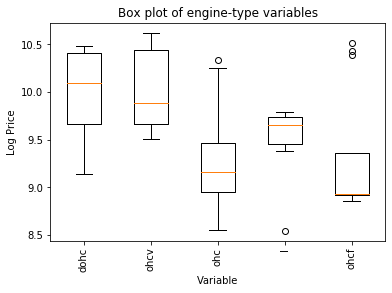

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([dohc['price'], ohcv['price'],ohc['price'],l['price'],ohcf['price']])
plt.ylabel('Log Price')
ax.set_xticklabels(['dohc', 'ohcv','ohc','l', 'ohcf'], rotation = 'vertical')
plt.xlabel('Variable')
plt.title('Box plot of engine-type variables');

The box plot has large variations within groups

In [38]:
f_statistic, p_value = ss.f_oneway(dohc['price'], ohcv['price'],ohc['price'],l['price'],ohcf['price'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 12.240416661771818
P-value = 6.947132815584052e-09


The F statistic is fairly large and the p-value is very small. We can reject the null hypothesis that the 5 variables have the same mean, as the probability of the differences arising from random chance is quite low.

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df2 = pd.DataFrame({'vals' :dohc['price'].tolist() + 
                    ohcv['price'].tolist() +
                   ohc['price'].tolist() +l['price'].tolist() +
                    ohcf['price'].tolist(),
                   'group_num': ['dohc'] * len(dohc) + ['ohcv'] * len(ohcv) + 
                    ['ohc'] * len(ohc) +
                   ['l'] * len(l) + ['ohcf'] *len(ohcf) })
Tukey_HSD = pairwise_tukeyhsd(df2.vals, df2.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  dohc      l   -0.444  0.128   -0.96  0.0721  False
  dohc    ohc  -0.7516  0.001 -1.1792 -0.3241   True
  dohc   ohcf  -0.6959 0.0025  -1.212 -0.1799   True
  dohc   ohcv   0.0466    0.9 -0.5635  0.6567  False
     l    ohc  -0.3077 0.0647 -0.6267  0.0114  False
     l   ohcf  -0.2519 0.4917 -0.6824  0.1785  False
     l   ohcv   0.4906 0.0939  -0.049  1.0301  False
   ohc   ohcf   0.0557    0.9 -0.2633  0.3747  False
   ohc   ohcv   0.7982  0.001  0.3426  1.2539   True
  ohcf   ohcv   0.7425 0.0019  0.2029  1.2821   True
----------------------------------------------------


From the table, we can see whether there is significant difference based on p-values and the reject column. "True" means we
reject the null hypoehtisis, there is a difference.

#### Next, we need to use Bayesian method to compare multipopulations.

In [40]:
#create std and turbo data frame with log price
dohc= pd.DataFrame()
ohcv= pd.DataFrame()
ohc= pd.DataFrame()
l = pd.DataFrame()
ohcf = pd.DataFrame()


dohc['price']=df[df['engine-type'] == 'dohc']['log price']
ohcv['price']=df[df['engine-type'] == 'ohcv']['log price']
ohc['price']=df[df['engine-type'] == 'ohc']['log price']
l['price']=df[df['engine-type'] == 'l']['log price']
ohcf['price']=df[df['engine-type'] == 'ohcf']['log price']

In [41]:
#create a posterior distribution for dohc
N = 10000
p = np.linspace(8, 12, num=N)

pp = ss.norm.pdf(p, loc=dohc.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_dohc = comp_like(p, dohc['price'])
post_dohc= posterior(pp, like_dohc)

In [42]:
#create a posterior distribution for ohcv
pp = ss.norm.pdf(p, loc=ohcv.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_ohcv = comp_like(p, ohcv['price'])
post_ohcv= posterior(pp, like_ohcv)

In [43]:
#create a posterior distribution for ohc
pp = ss.norm.pdf(p, loc=ohc.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_ohc = comp_like(p, ohc['price'])
post_ohc = posterior(pp, like_ohc)

In [44]:
#create a posterior distribution for l
pp = ss.norm.pdf(p, loc=l.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_l= comp_like(p, l['price'])
post_l= posterior(pp, like_l)

In [45]:
# Create a posterior distribution for ohcf
pp = ss.norm.pdf(p, loc=ohcf.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_ohcf= comp_like(p, ohcf['price'])
post_ohcf = posterior(pp, like_ohcf)

I'd like to plot CIs for each category further analysis.

The 0.950 credible interval is 9.513 to 9.942


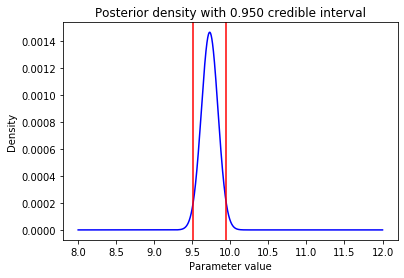

In [46]:
plot_ci(p, post_dohc, N, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 9.809 to 10.271


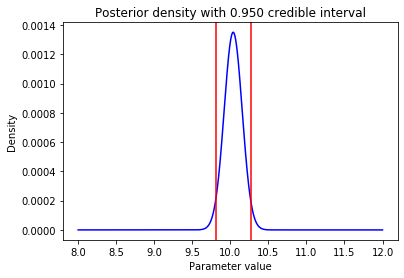

In [47]:
plot_ci(p, post_ohcv, N, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 9.169 to 9.314


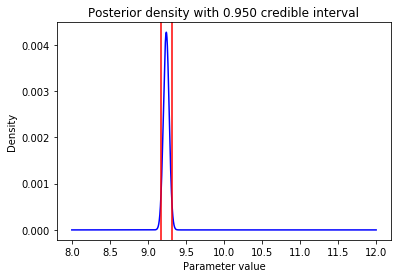

In [48]:
plot_ci(p, post_ohc, N, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 9.359 to 9.733


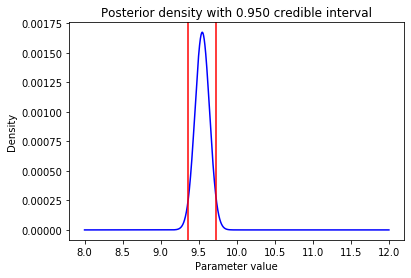

In [49]:
plot_ci(p, post_l, N, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 9.007 to 9.602


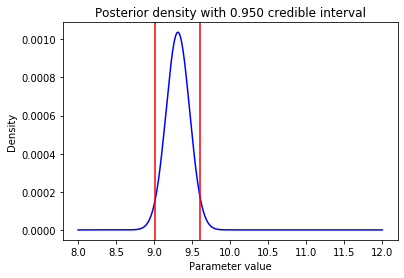

In [50]:
plot_ci(p, post_ohcf, N, lower_q=.025, upper_q=.975)

### Summary for multipopulation Bayesian method
dohc:The 0.950 credible interval is 9.519 to 9.941

ohcv:The 0.950 credible interval is  9.807 to 10.269

ohc:The 0.950 credible interval is 9.168 to 9.314

l:The 0.950 credible interval is 9.364 to 9.733

ohcf:The 0.950 credible interval is 9.009 to 9.613

##### If CIs overlap, implying that there is no significant difference between two categories, vice versa.

dohc and l: overlap, no difference 

dohc and ohc: not overlap, difference

dohc and ohcf: overlap, no difference

dohc and ohcv: overlap, no difference

l and ohc: not overlap, difference

l and ohcf:  overlap, no difference

l and ohcv: no overlap, difference

ohc and ohcf:overlap, no difference

ohc and ohcv: not ovelap, difference

ohcf and ohcv:overlap, no difference

Compared with the boostrapping method, the analysis is quite different.  dohc vs ohcf, l and ohcf, l and ohcv, ohcf and ohcv. This is caused by the randomness of boostrapping sample. 

## Summary for multipopulation comparisons
1. boostrap analysis is the same as Bayesian analysis, except a few pairs, which chould be due to uncertainty of small overlap of CIs.
2. classical analysis (L4) agree with boostrapping analysis.
3. classical analysis (L4) does not quite agree with Bayesian analysis, This is also due to the small overlap of CIs in Bayesian method bewtween pairs
